# Non-vectorized version

In [401]:
def prod_non_zero_diag(x):
    mult = 1
    for i in range(min(len(x), len(x[0]))):
        if (x[i][i]!=0):
            mult = mult * x[i][i]
    return mult



In [402]:
def are_multisets_equal(x, y):
    y = list(y)
    for i in x:
        if y.count(i) != 0:
            y.remove(i)
        else:
            return False
    return y==[]



In [403]:
def max_after_zero(x):
    y = [x[i] for i in range(1, len(x)) if x[i-1]==0]
    return max(y)



In [404]:
def convert_image(img, vec):
    vec = list(vec)
    img = list(img)
#     print (len(img), len(img[0]))
    im = []
    for i in range(len(img)):
        im.append([])
        for j in range(len(img[0])):
            im[i].append([0])
            a = 0
            for k in range(len(vec)):
                a = a + img[i][j][k] * vec[k]
            im[i][j] = a
    return im



In [405]:
def run_length_encoding(x):
    counts = []
    nums = [x[0]]
    k = 1
    for i in range(1, len(x)):
        if x[i] == x[i-1]:
            k = k + 1
        else:
            counts.append(k)
            k = 1
            nums.append(x[i])
    counts.append(k)
    return (nums, counts)



In [406]:
import scipy.spatial.distance
def pairwise_distance(x,y):
    a = []
    for i in range(len(x)):
        a.append([])
        for j in range(len(y)):
            a[i].append(([(x[i][k] - y[j][k])**2 
                          for k in range(len(x[0]))]))
            a[i][j] = abs((sum(a[i][j]))**0.5)
#     b = scipy.spatial.distance.cdist(x,y)
#     print(a)
#     print(b)
    return a==b



# Vectorized version

In [458]:
def prod_non_zero_diag(x):
    a = np.diag(x)
    return np.prod(a[a != 0])



In [459]:
def are_multisets_equal(x, y):
    x = np.sort(x)
    y = np.sort(y)
    return np.array_equal(x, y)



In [31]:
def max_after_zero(x):
    y = np.where(x == 0)
    idx = np.array(y) + 1
    idx = idx[idx < x.size]
    return np.max([x[idx]])



In [461]:
def convert_image(img, vec):
    im = np.dot(img, vec)
    return im



In [163]:
def run_length_encoding(x):
    d = np.diff(x)
    nums = x[np.insert(d.astype(np.bool), 0, True)]
    idx = np.array(np.where(d != 0))
    idx = idx + 1
    idx = np.insert(idx, 0, 0)
    idx = np.append(idx, len(x))
    idxx = idx[1:]
    print(idx, idxx)
    counts = idxx - idx[0:-1]
    return (nums, counts)



In [156]:
# import scipy.spatial.distance
import numpy.matlib 
def pairwise_distance(x,y):
    a = np.zeros((x.shape[0], y.shape[0]))
    X = np.repeat(x, (y.shape[0] + np.zeros(x.shape[0]))
                  .astype(np.int), axis = 0)
    Y = np.matlib.repmat(y, x.shape[0],1)
    a = ((X - Y) ** 2)
    a = (np.sum(a, axis=1))**0.5
    a = a.reshape((x.shape[0], y.shape[0]))
    return a



/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


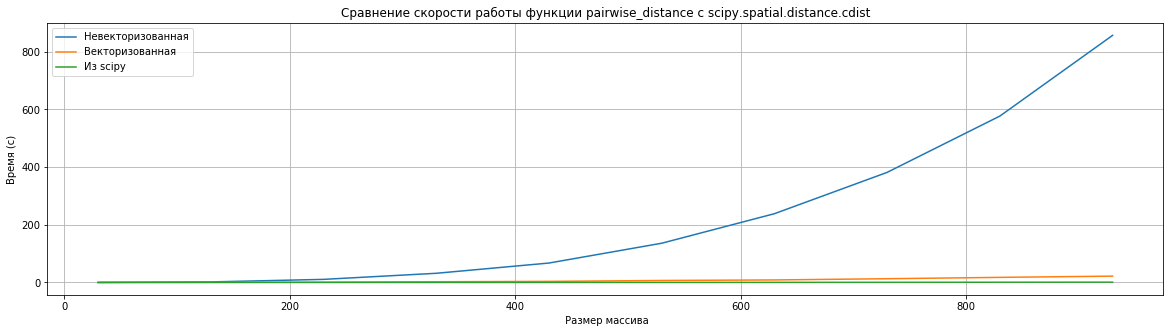

In [32]:
import scipy.spatial.distance
import functions as fu
import functions_vectorized as fuv

time_non_vectorized = np.array([])
time_vectorized = np.array([])
time_builtin_func = np.array([])
for sizze in range(30, 1000, 100):
    x = np.random.randint(10, size=(sizze, sizze))
    y = np.random.randint(10, size=(sizze, sizze))
    start = time()
    fu.pairwise_distance(list(x), list(y))
    end = time()
    time_non_vectorized = np.append(time_non_vectorized, end - start)
    start = time()
    fuv.pairwise_distance(x,y)
    end = time()
    time_vectorized = np.append(time_vectorized, end - start)
    start = time()
    scipy.spatial.distance.cdist(x,y)
    end = time()
    time_builtin_func = np.append(time_builtin_func, end - start)


fig, ax = plt.subplots(figsize = (20, 5))

ax.plot(range(30, 1000, 100), time_non_vectorized, label=u"Невекторизованная")
ax.plot(range(30, 1000, 100), time_vectorized, label=u"Векторизованная")
ax.plot(range(30, 1000, 100), time_builtin_func, label=u"Из scipy")
ax.set_title(u"Сравнение скорости работы функции pairwise_distance с \
             scipy.spatial.distance.cdist")
ax.set_xlabel(u" Размер массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()

## Задание 7 Часть 1

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


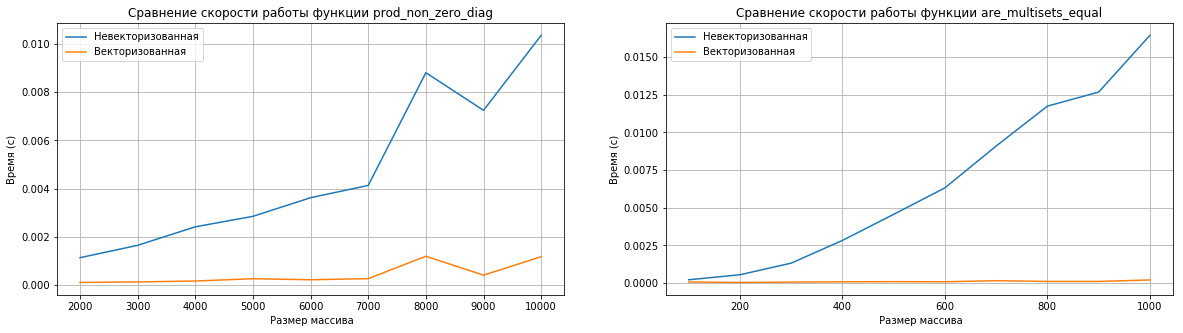

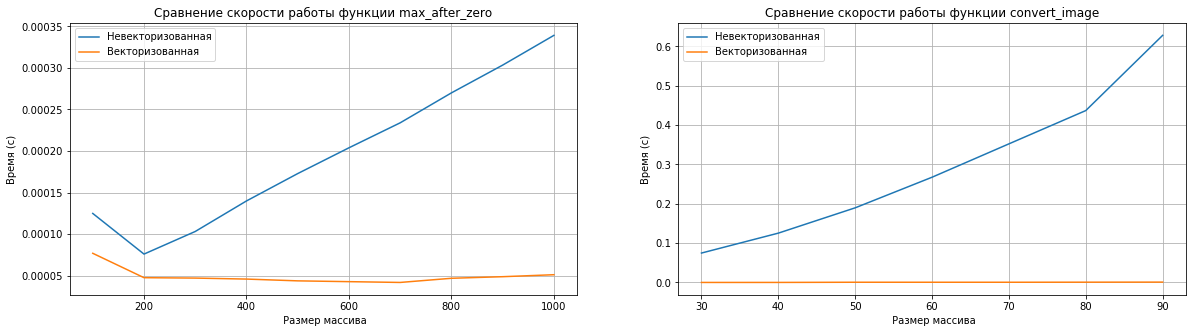

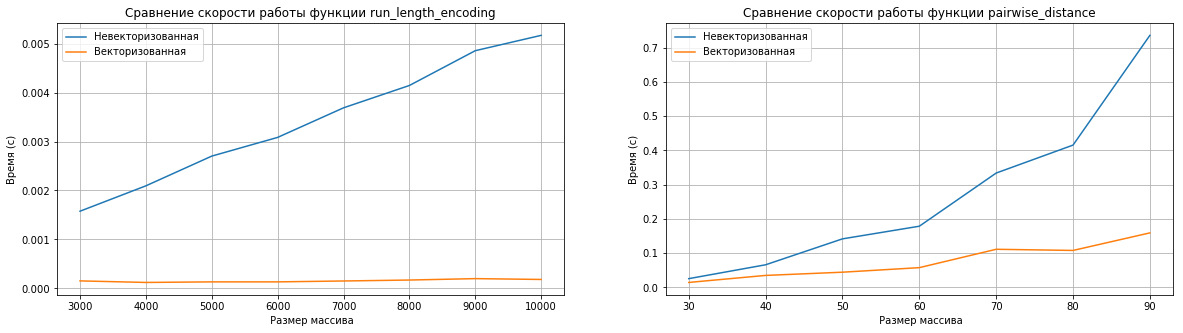

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import functions as fu
import functions_vectorized as fuv

%matplotlib inline

time1_non_vectorized = np.array([])
time1_vectorized = np.array([])
for sizze in range(2000, 11000, 1000):
    x = np.random.randint(2, size=(sizze, sizze), dtype='int64')
    X = list(x)
    start = time()
    fu.prod_non_zero_diag(X)
    end = time()
    time1_non_vectorized = np.append(time1_non_vectorized, end - start)
    start = time()
    fuv.prod_non_zero_diag(x)
    end = time()
    time1_vectorized = np.append(time1_vectorized, end - start)

time2_non_vectorized = np.array([])
time2_vectorized = np.array([])
for sizze in range(100, 1100, 100):
    x = np.random.randint(7, size=sizze) 
    y = np.random.randint(7, size=sizze)
    X = list(x)
    Y = list(y)
    start = time()
    fu.are_multisets_equal(X, Y)
    end = time()
    time2_non_vectorized = np.append(time2_non_vectorized, end - start)
    start = time()
    fuv.are_multisets_equal(x, y)
    end = time()
    time2_vectorized = np.append(time2_vectorized, end - start)

time3_non_vectorized = np.array([])
time3_vectorized = np.array([])
for sizze in range(100, 1100, 100):
    x = np.random.randint(8, size=sizze)
    start = time()
    fu.max_after_zero(list(x))
    end = time()
    time3_non_vectorized = np.append(time3_non_vectorized, end - start)
    start = time()
    fuv.max_after_zero(x)
    end = time()
    time3_vectorized = np.append(time3_vectorized, end - start)

time4_non_vectorized = np.array([])
time4_vectorized = np.array([])
for sizze in range(30, 100, 10):
    numCh = 20
    x = np.random.randint(255, size=(sizze, sizze, numCh))
    y = np.random.rand(numCh)
    start = time()
    fu.convert_image(list(x), list(y))
    end = time()
    time4_non_vectorized = np.append(time4_non_vectorized, end - start)
    start = time()
    fuv.convert_image(x, y)
    end = time()
    time4_vectorized = np.append(time4_vectorized, end - start)
    
time5_non_vectorized = np.array([])
time5_vectorized = np.array([])
for sizze in range(3000, 11000, 1000):
    x = np.random.randint(100, size=sizze) 
    start = time()
    fu.run_length_encoding(list(x))
    end = time()
    time5_non_vectorized = np.append(time5_non_vectorized, end - start)
    start = time()
    fuv.run_length_encoding(x)
    end = time()
    time5_vectorized = np.append(time5_vectorized, end - start)
    
time6_non_vectorized = np.array([])
time6_vectorized = np.array([])
for sizze in range(30, 100, 10):
    x = np.random.randint(10, size=(sizze, sizze))
    y = np.random.randint(10, size=(sizze, sizze))
    start = time()
    fu.pairwise_distance(list(x), list(y))
    end = time()
    time6_non_vectorized = np.append(time6_non_vectorized, end - start)
    start = time()
    fuv.pairwise_distance(x,y)
    end = time()
    time6_vectorized = np.append(time6_vectorized, end - start)

# print(time3_vectorized == [])    

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(range(2000, 11000, 1000), time1_non_vectorized, label=u"Невекторизованная")
ax1.plot(range(2000, 11000, 1000), time1_vectorized, label=u"Векторизованная")
ax1.set_title(u"Сравнение скорости работы функции prod_non_zero_diag")
ax1.set_xlabel(u" Размер массива")
ax1.set_ylabel(u"Время (с)")
ax1.grid()
ax1.legend()

ax2.plot(range(100, 1100, 100), time2_non_vectorized, label=u"Невекторизованная")
ax2.plot(range(100, 1100, 100), time2_vectorized, label=u"Векторизованная")
ax2.set_title(u"Сравнение скорости работы функции are_multisets_equal")
ax2.set_xlabel(u" Размер массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

fig1.show()

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 5))

ax3.plot(range(100, 1100, 100), time3_non_vectorized, label=u"Невекторизованная")
ax3.plot(range(100, 1100, 100), time3_vectorized, label=u"Векторизованная")
ax3.set_title(u"Сравнение скорости работы функции max_after_zero")
ax3.set_xlabel(u" Размер массива")
ax3.set_ylabel(u"Время (с)")
ax3.grid()
ax3.legend()

ax4.plot(range(30, 100, 10), time4_non_vectorized, label=u"Невекторизованная")
ax4.plot(range(30, 100, 10), time4_vectorized, label=u"Векторизованная")
ax4.set_title(u"Сравнение скорости работы функции convert_image")
ax4.set_xlabel(u" Размер массива")
ax4.set_ylabel(u"Время (с)")
ax4.grid()
ax4.legend()

fig2.show()

fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(20, 5))

ax5.plot(range(3000, 11000, 1000), time5_non_vectorized, label=u"Невекторизованная")
ax5.plot(range(3000, 11000, 1000), time5_vectorized, label=u"Векторизованная")
ax5.set_title(u"Сравнение скорости работы функции run_length_encoding")
ax5.set_xlabel(u" Размер массива")
ax5.set_ylabel(u"Время (с)")
ax5.grid()
ax5.legend()

ax6.plot(range(30, 100, 10), time6_non_vectorized, label=u"Невекторизованная")
ax6.plot(range(30, 100, 10), time6_vectorized, label=u"Векторизованная")
ax6.set_title(u"Сравнение скорости работы функции pairwise_distance")
ax6.set_xlabel(u" Размер массива")
ax6.set_ylabel(u"Время (с)")
ax6.grid()
ax6.legend()

fig3.show()


**Оценка: 6.0**

**Открытые источники, использованные в работе: 
https://stackoverflow.com/questions/1066758/**